In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
import numpy as np
import matplotlib.patches as patches
from OldBrain import Neuron, GMM, Net
from collections import defaultdict

In [2]:
import torch
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [3]:
num_neurons = 200
kernels = [[5,5]]
locs = list(zip(np.random.randint(7,21,num_neurons),np.random.randint(7,21,num_neurons)))
network = Net(28,28,num_neurons, bias=0.0001, decay=0.00001, kernels=kernels, locs=locs, sleep_cycle=1000)
weights = np.full(num_neurons,0.5).reshape(num_neurons,1)
one_neuron = Neuron([num_neurons,1], weights, bias=0.00001, decay=0.0001, pi=1)

one_neuron.bias =  [1.00000079e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


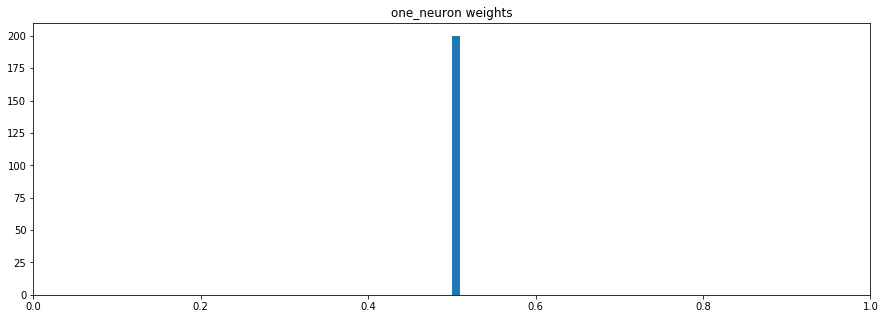

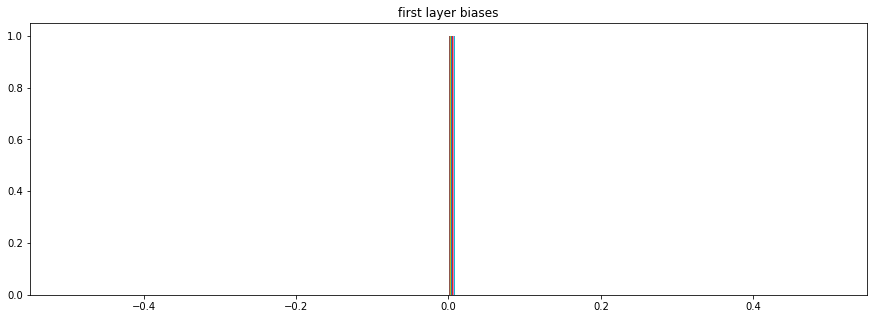

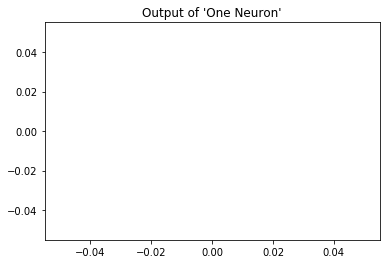

one_neuron.bias =  [1.00006005e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


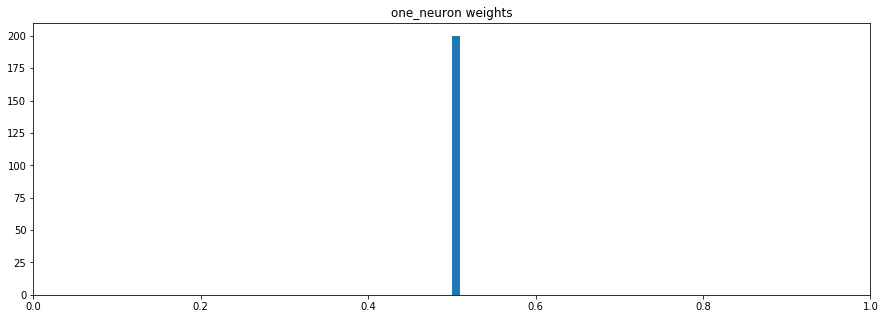

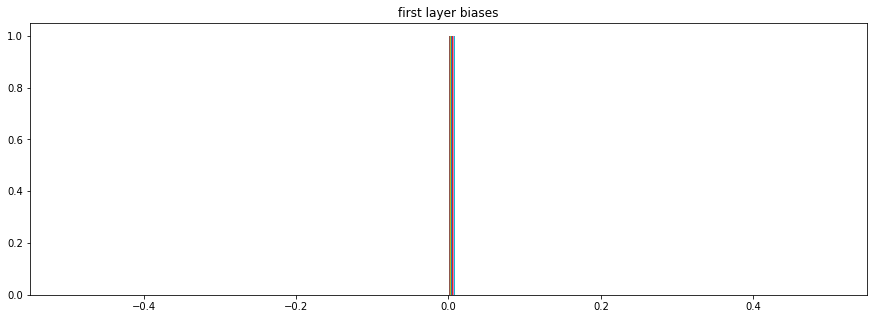

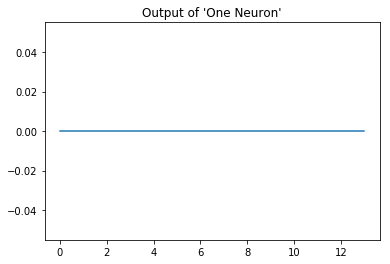

one_neuron.bias =  [1.00007967e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


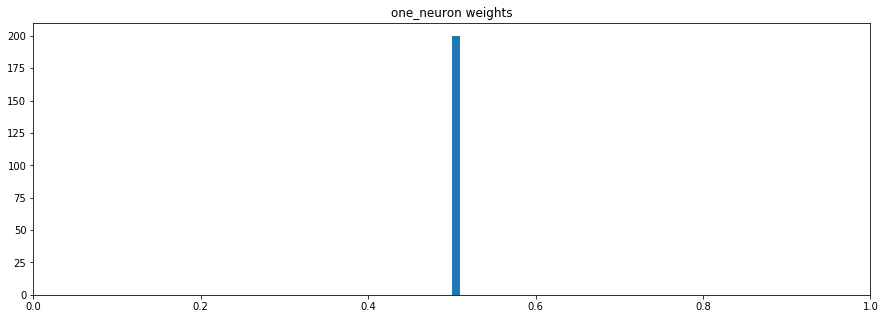

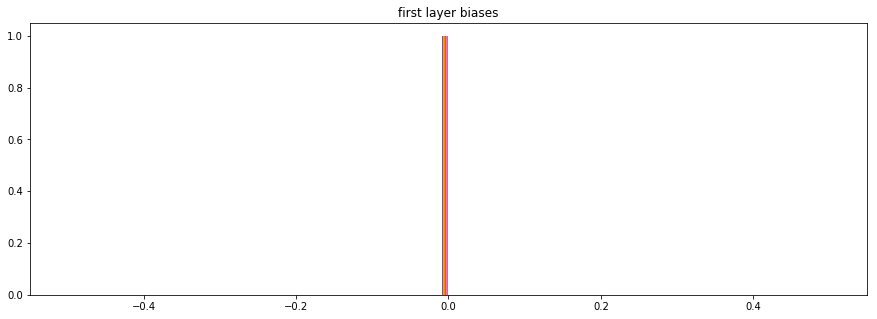

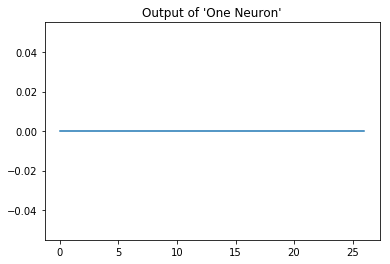

one_neuron.bias =  [1.00007967e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


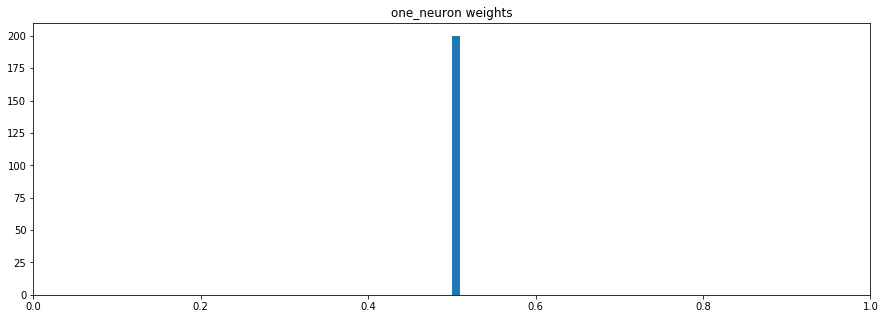

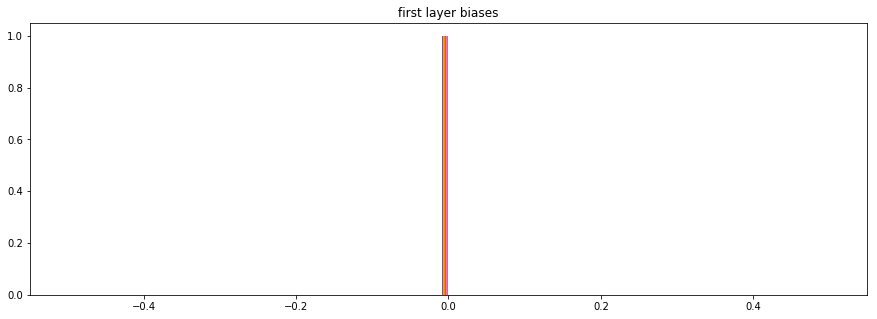

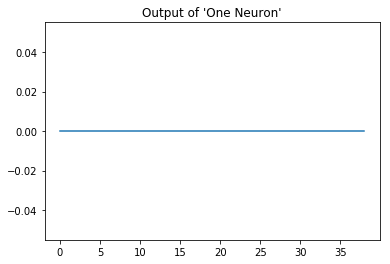

one_neuron.bias =  [1.00007967e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


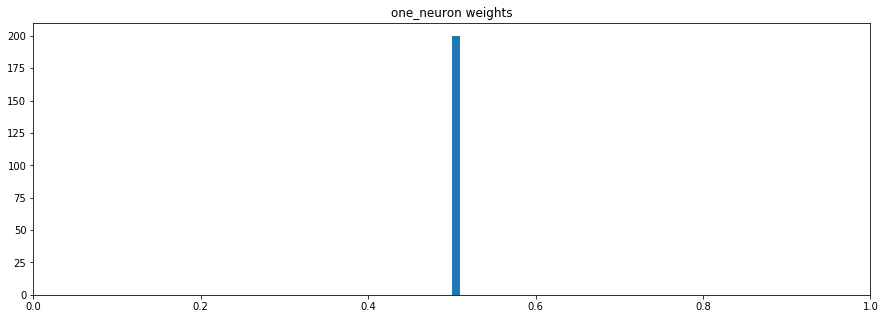

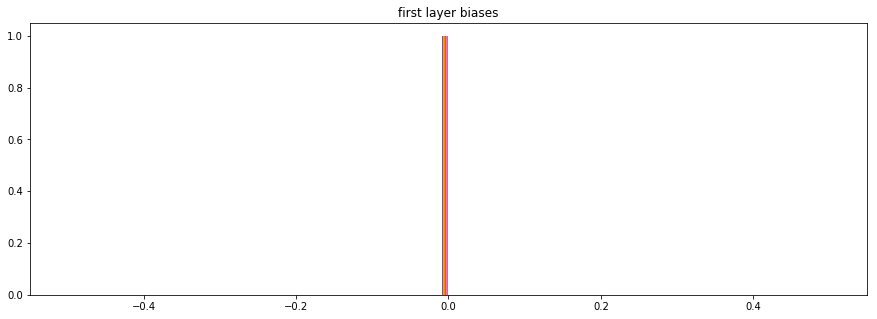

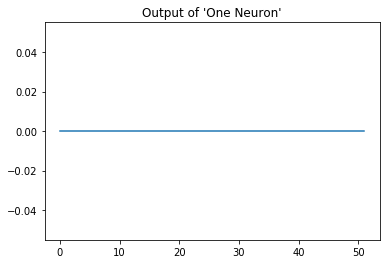

one_neuron.bias =  [1.00007967e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


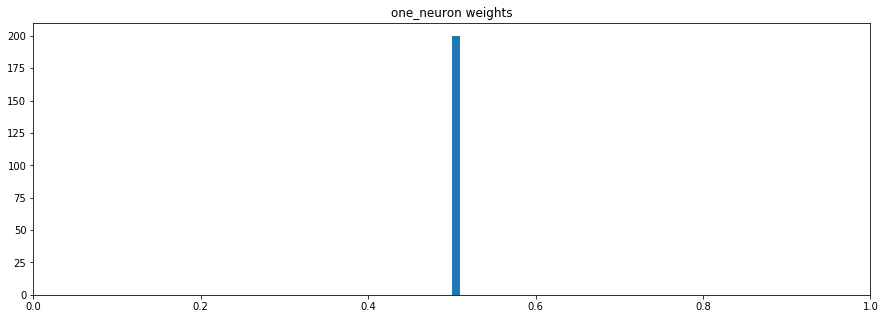

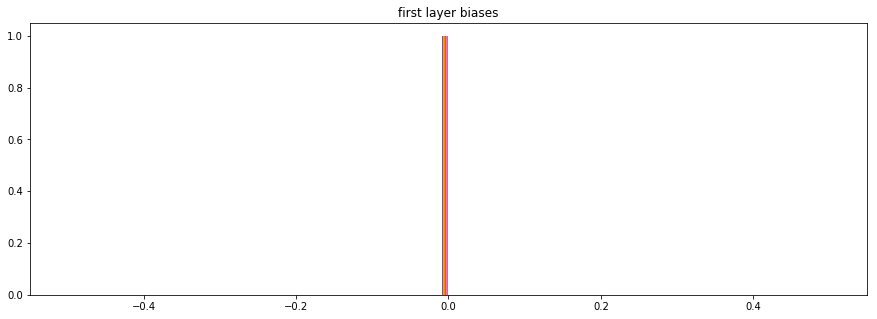

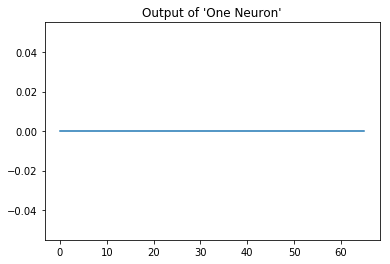

one_neuron.bias =  [1.00007967e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


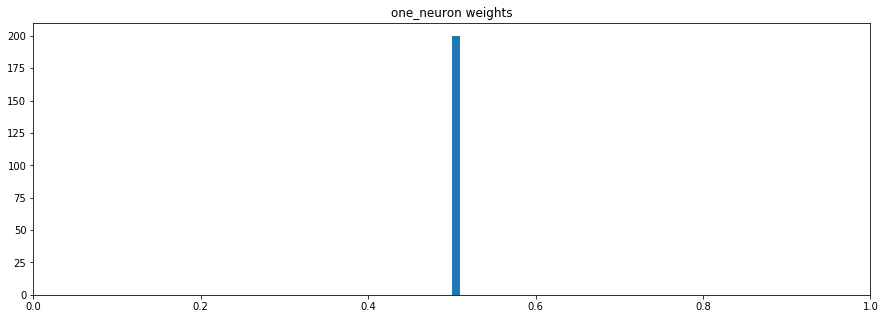

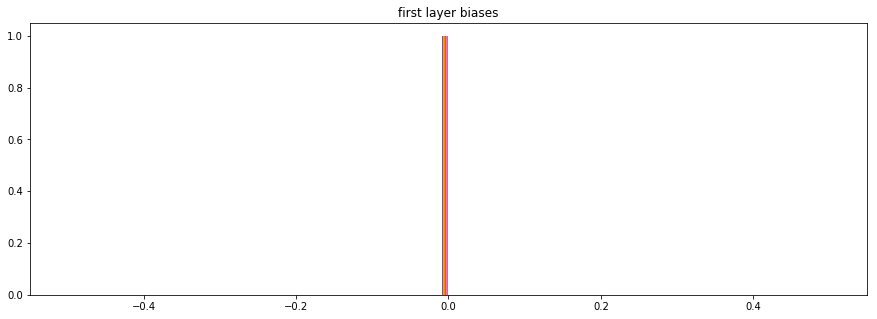

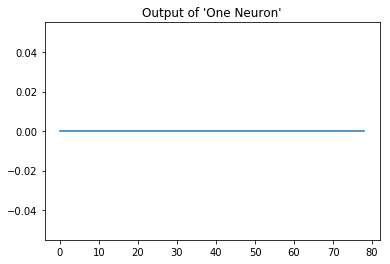

one_neuron.bias =  [1.00007967e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


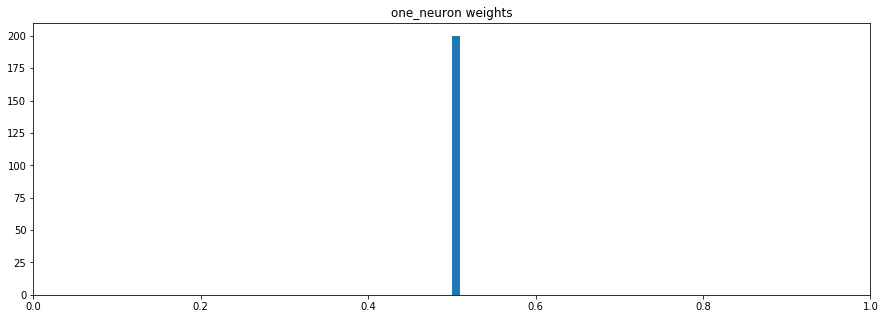

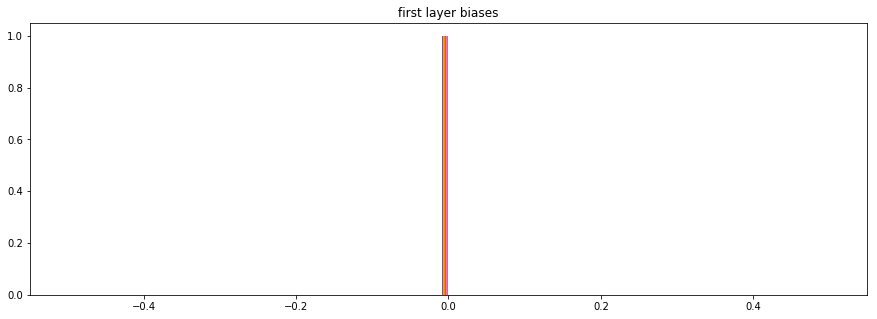

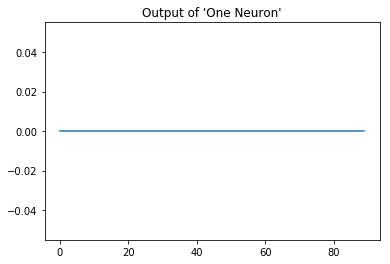

one_neuron.bias =  [1.00007967e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


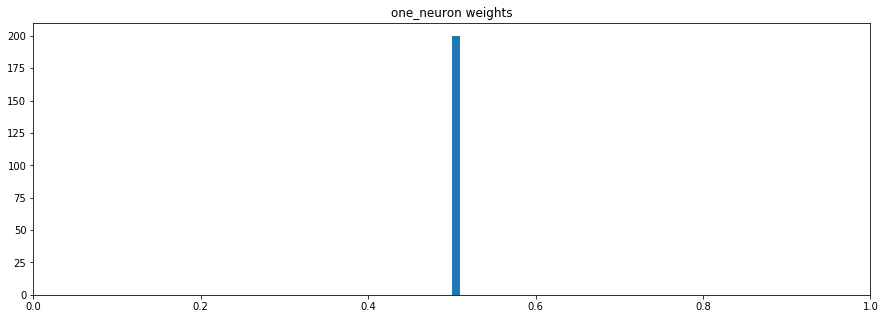

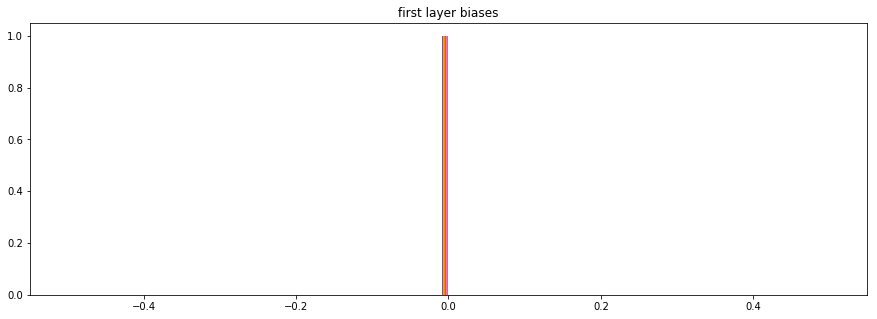

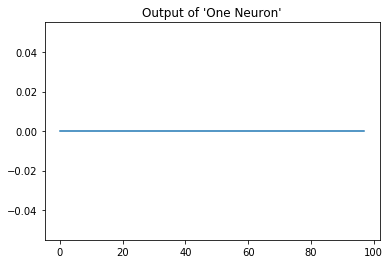

one_neuron.bias =  [1.00007967e-05]
min(biases) =  [0.0001]
max(biases) =  [0.0001]


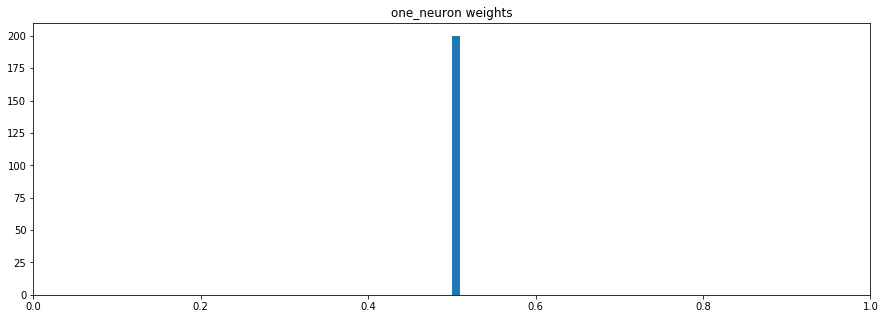

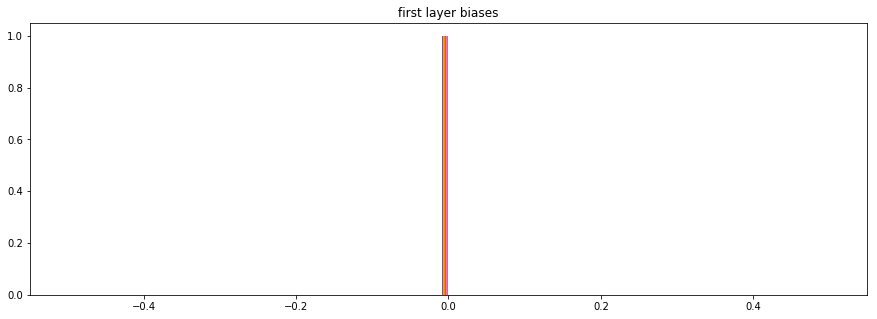

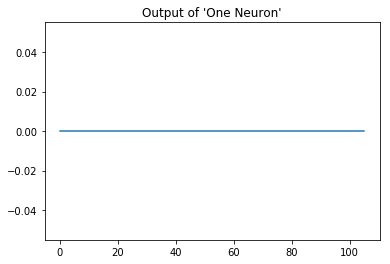

SLEEPING!
neurons =  [<OldBrain.Neuron object at 0x7f1da3ac5290>]
pi =  [nan]
neurons =  [<OldBrain.Neuron object at 0x7f1da3ac52d0>, <OldBrain.Neuron object at 0x7f1da3ac5d90>]
pi =  [nan]
pi =  [nan]
neurons =  [<OldBrain.Neuron object at 0x7f1da3ac5310>]
pi =  [nan]
neurons =  [<OldBrain.Neuron object at 0x7f1da3ac5350>, <OldBrain.Neuron object at 0x7f1da3ad4050>, <OldBrain.Neuron object at 0x7f1da3ad4650>, <OldBrain.Neuron object at 0x7f1da3ad47d0>]
pi =  [nan]
pi =  [nan]
pi =  [nan]
pi =  [nan]
neurons =  [<OldBrain.Neuron object at 0x7f1da3ac5390>]
pi =  [nan]
neurons =  [<OldBrain.Neuron object at 0x7f1da3ac53d0>]
pi =  [nan]
neurons =  [<OldBrain.Neuron object at 0x7f1da3ac5410>]
pi =  [nan]
neurons =  [<OldBrain.Neuron object at 0x7f1da3ac5450>, <OldBrain.Neuron object at 0x7f1da0bd3290>]
pi =  [nan]
pi =  [nan]
neurons =  [<OldBrain.Neuron object at 0x7f1da3ac5490>, <OldBrain.Neuron object at 0x7f1da0bd3410>, <OldBrain.Neuron object at 0x7f1da0bd3f90>, <OldBrain.Neuron objec

/home/ndc08/Dropbox/code/notebooks/dissertation/OldBrain.py:182: RuntimeWarning: invalid value encountered in true_divide
  neuron.pi = neuron.tot_exp/self.total_activity
/home/ndc08/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6575: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/ndc08/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6576: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: max must be larger than min in range parameter.

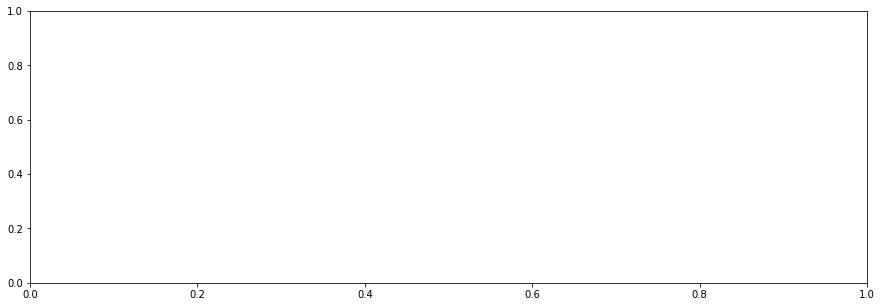

In [4]:
one_guesses = []
for i,(im,label) in enumerate(mnist_trainset):
    if label==1:
        feedback=20
    else:
        feedback=1
    y = network(np.expand_dims(im,0)/255.0)
    is_it_a_one = one_neuron(np.expand_dims(y,0),feedback)
    if label==1:
        one_guesses.append(is_it_a_one)
        
    if i%100 == 0:
        print('one_neuron.bias = ', one_neuron.bias)
        plt.figure(0,figsize=(15,5)); plt.hist(one_neuron.weights,100); plt.title('one_neuron weights')
        plt.xlim(0,1)
        biases = []
        for b in network.neurons.values():
            biases.extend([n.bias for n in b])
        plt.figure(1,figsize=(15,5)); plt.hist(biases,100); plt.title('first layer biases')
        print("min(biases) = ", min(biases))
        print("max(biases) = ", max(biases))
        plt.figure(2)
        plt.plot(one_guesses); plt.title("Output of \'One Neuron\'")
        plt.show()